In [2]:
pip install squarify

In [3]:
# Import necessary libraries

import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
import squarify
from plotly.offline import init_notebook_mode,iplot
from wordcloud import WordCloud
import numpy as np
from scipy import stats
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.colors
from collections import Counter
# Set style
sns.set(style='whitegrid')

<ipython-input-3-c0c6f58e3055>:23: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [9]:
# load the data

df = pd.read_csv('marketing_campaign.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [10]:
# Find missing values

df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
# Data statistical analysis

df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [13]:
# Fill missing incomn with mean

df['Income'].fillna(df['Income'].mean(), inplace=True)

# Check missing values again
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [14]:
# Get unique values of education column

df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [15]:
# Get unique values of Marital Status column

df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [16]:
# Get unique values of response column

df.Response.unique()

array([1, 0])

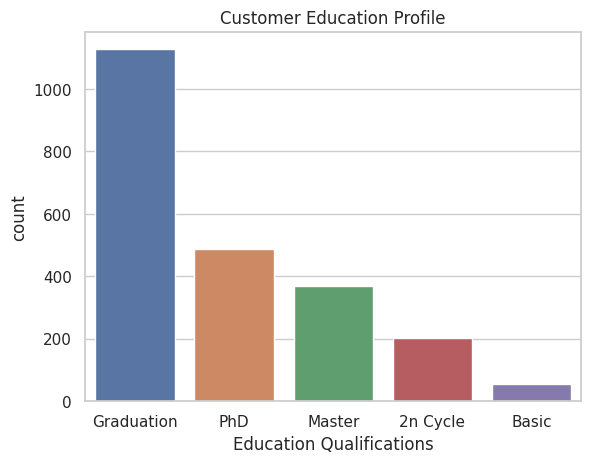

In [17]:
# Visualize Customer Education Profile
sns.countplot(x='Education',data=df, order = df['Education'].value_counts().index)
plt.xlabel('Education Qualifications')
plt.title("Customer Education Profile")

plt.show()

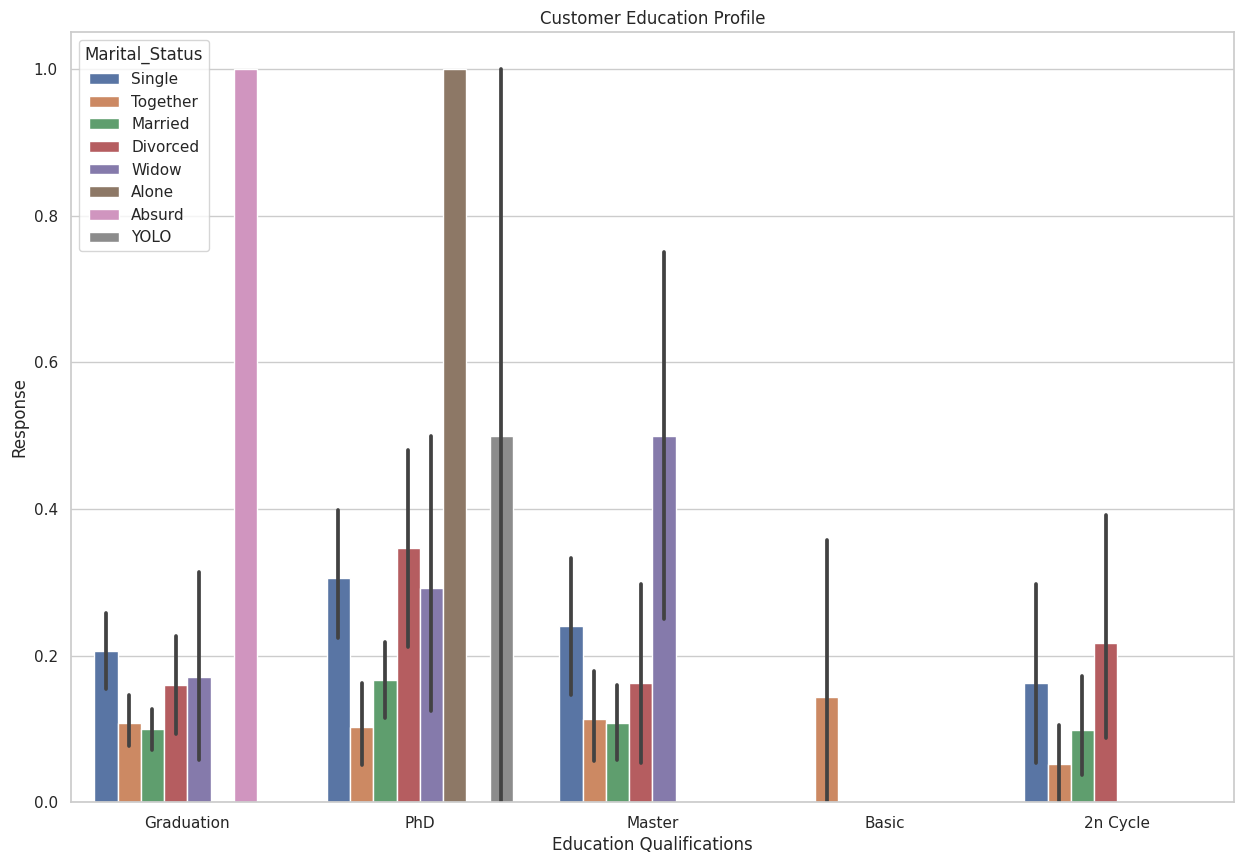

In [20]:
# Customer's Education profile and Response rate
plt.figure(figsize = (15,10))

sns.barplot(x='Education',y='Response', data=df, hue='Marital_Status')
plt.xlabel('Education Qualifications')
plt.title("Customer Education Profile")

plt.show()

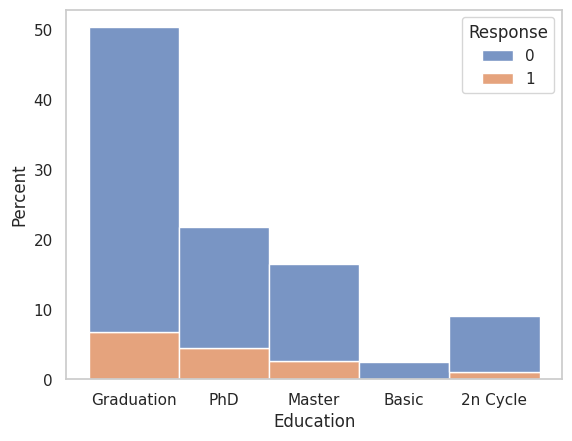

In [21]:
# Education & Response
sns.histplot(x="Education", hue="Response", data=df, multiple="stack", stat="percent")

plt.grid(False)

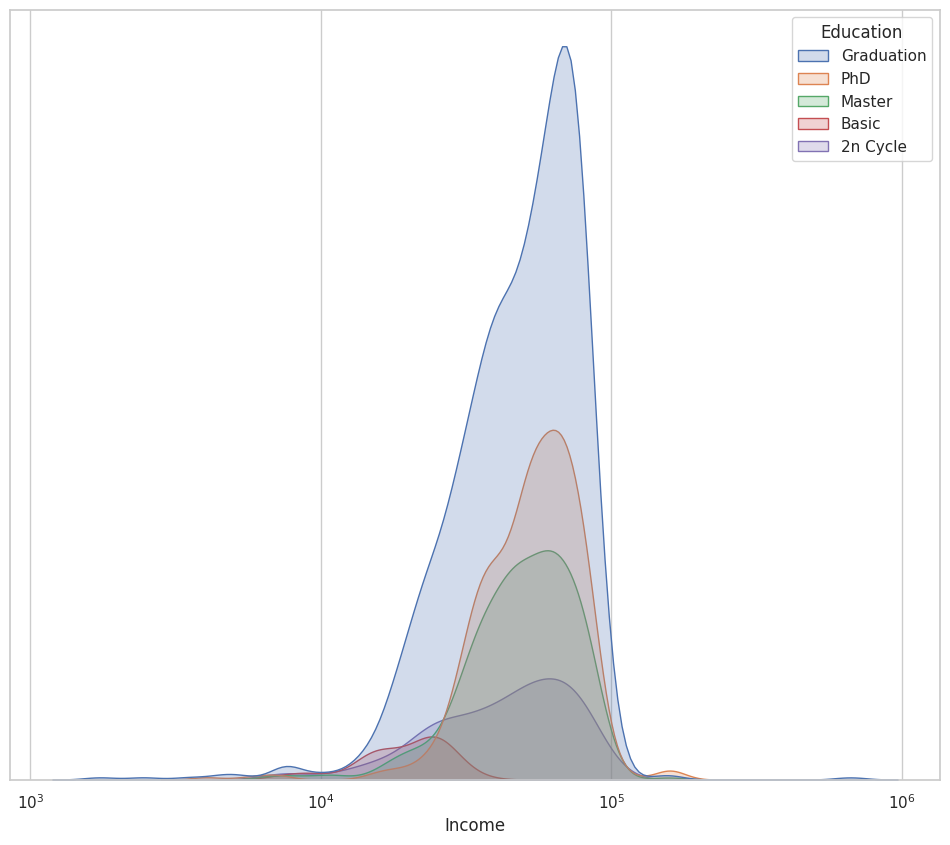

In [29]:
# Education and Income
plt.figure(figsize=(12,10))
sns.kdeplot(
   data=df, x="Income", hue="Education", log_scale= True,
   fill=True
)
plt.gca().axes.get_yaxis().set_visible(False)

plt.show()

In [30]:
# Analyze Marital Status and Purchases
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

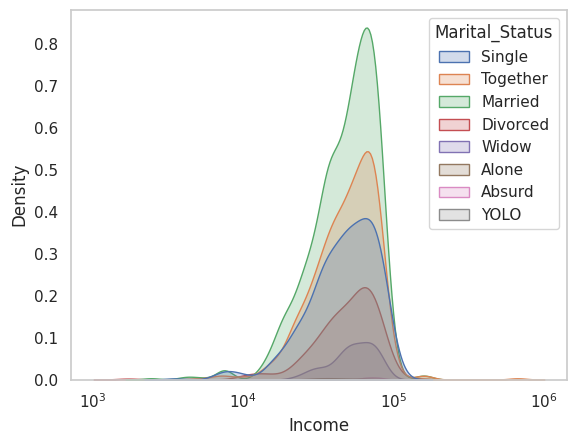

In [33]:
# Marital Status vs Income
sns.kdeplot(
   data=df, x="Income", hue="Marital_Status", log_scale= True,
   fill=True, warn_singular=False
)
plt.grid(False)

plt.show()

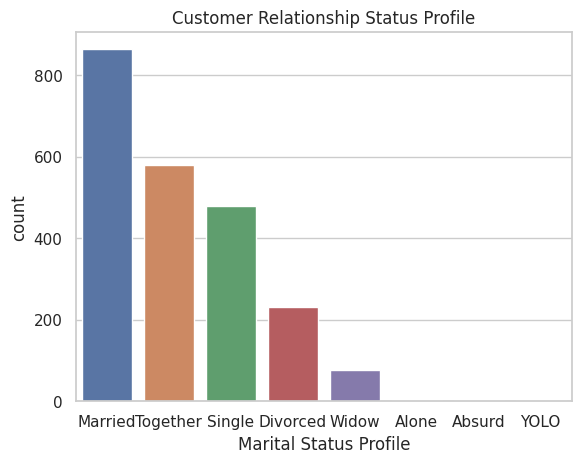

In [36]:
# Customer Relationship Status Profile
sns.countplot(x='Marital_Status',data=df,order = df['Marital_Status'].value_counts().index)
plt.xlabel('Marital Status Profile')
plt.title("Customer Relationship Status Profile")

plt.show()

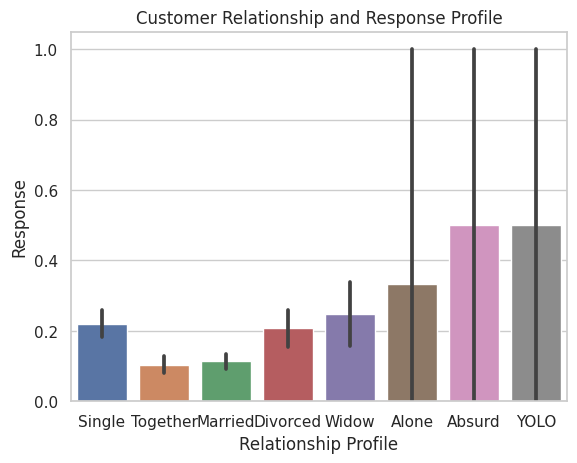

In [37]:
# Customer's Relationship profile and Response rate
sns.barplot(x='Marital_Status',y='Response', data=df)
plt.xlabel('Relationship Profile')
plt.title("Customer Relationship and Response Profile")

plt.show()

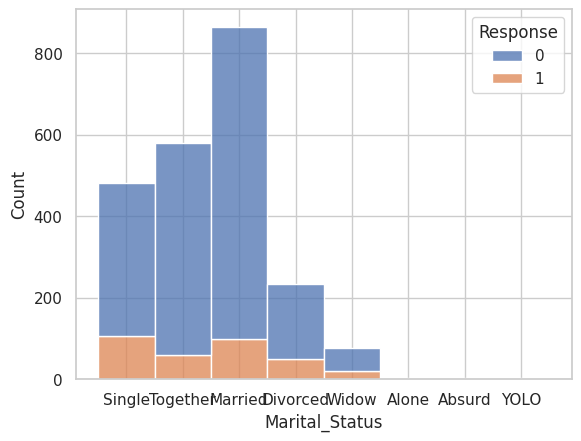

In [43]:
# Marital Status Vs Response Rate
sns.histplot( x="Marital_Status", data=df, hue="Response", multiple="stack")

plt.show()

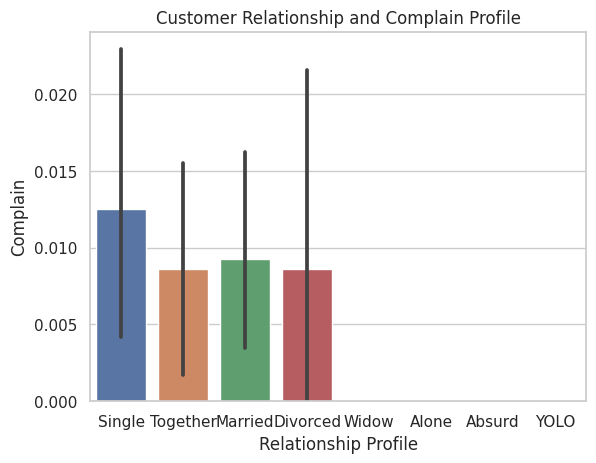

In [44]:
# Customer's Relationship profile and Complain
sns.barplot(x='Marital_Status',y='Complain', data=df)
plt.xlabel('Relationship Profile')
plt.title("Customer Relationship and Complain Profile")

plt.show()

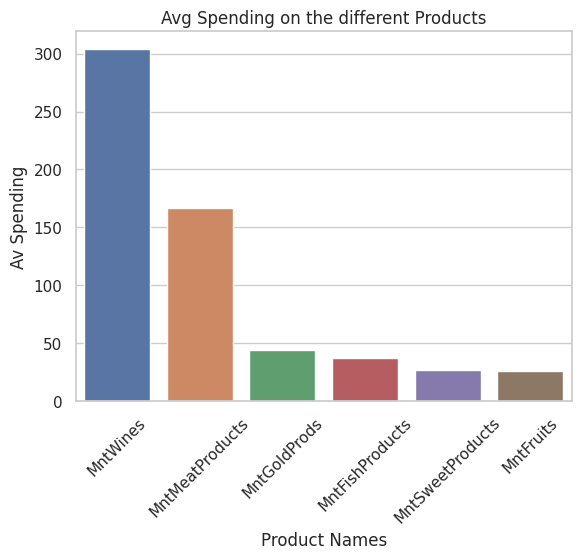

In [49]:
# Most bought products
pr = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
pr_means = pr.mean(axis=0).sort_values(ascending=False)
pr_means_df = pd.DataFrame(list(pr_means.items()), columns=['Product', 'Avg Spending'])
plt.title('Avg Spending on the different Products')
sns.barplot(data=pr_means_df, x='Product', y='Avg Spending');
plt.xlabel('Product Names')
plt.ylabel('Av Spending')
plt.xticks(rotation=45)

plt.show()

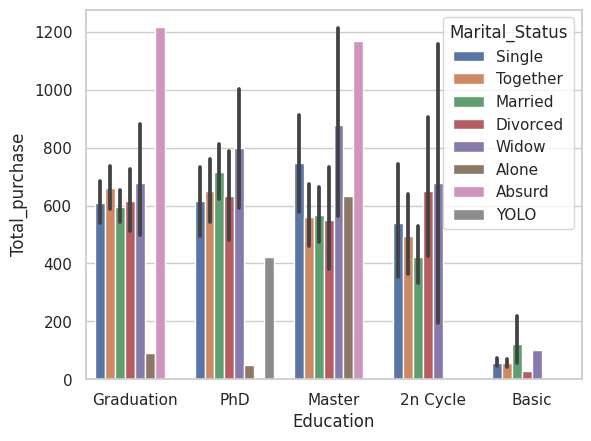

In [51]:
# Customer Age and Amount Spent on Product Purchases [ Who spent how much]
df['Total_purchase'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

sns.barplot(x='Education',y='Total_purchase',data=df,order=df['Education'].value_counts().index,hue='Marital_Status')

plt.show()

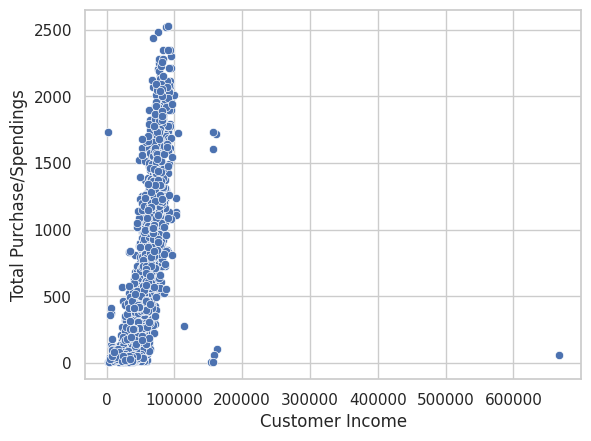

In [52]:
# Total Purchase/Spendings on diferent products by Income
sns.scatterplot(x=df['Income'], y=df['Total_purchase']);
plt.xlabel('Customer Income')
plt.ylabel('Total Purchase/Spendings')

plt.show()

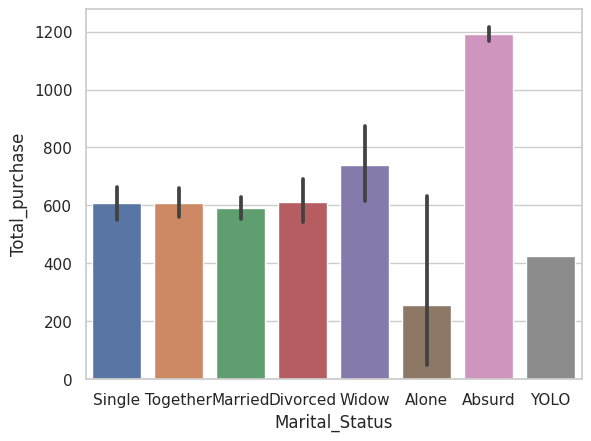

In [53]:
# Total Purchase by Marital Status
sns.barplot(x='Marital_Status',y='Total_purchase',data=df)

plt.show()

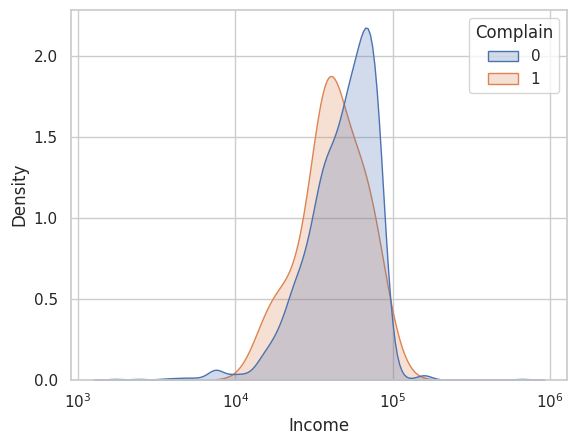

In [57]:
# Complaint Plot
sns.kdeplot(
   data=df, x="Income", hue="Complain", log_scale= True,
   fill=True, common_norm=False
)
plt.xlabel('Income')

plt.show()